<a href="https://colab.research.google.com/github/uttejkalluri2005/RNN-project/blob/main/Google_Stock_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
df = pd.read_csv("Google_Stock_Price_Train.csv")

In [42]:
op = df.iloc[:,1:2].values

In [43]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [44]:
sc = MinMaxScaler(feature_range=(0,1))

In [45]:
train_set = sc.fit_transform(op)

In [46]:
train_set.shape

(1258, 1)

In [47]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(train_set[i-60:i,0])
  y_train.append(train_set[i])
x_train,y_train = np.array(x_train),np.array(y_train)


In [48]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [49]:
x_train.shape

(1198, 60, 1)

In [50]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [51]:
reg = Sequential()

In [52]:
reg.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [53]:
reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

In [54]:
reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

In [55]:
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

In [56]:
reg.add(Dense(units=1))

In [57]:
reg.compile(optimizer="adam",loss="mean_squared_error")

In [58]:
reg.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.1001
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - loss: 0.0058
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 13s 237ms/step - loss: 0.0047
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - loss: 0.0058
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0055
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0060
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0045
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 134ms/step - loss: 0.0056
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.0056
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 0.0046
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - loss: 0.0046
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - loss: 0.0043
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9

In [59]:
df2 = pd.read_csv("Google_Stock_Price_Test.csv")

In [60]:
df_fin = pd.concat((df["Open"],df2["Open"]),axis=0)

In [61]:
inp = df_fin[len(df_fin)-len(df2)-60:].values

In [62]:
inp = inp.reshape(-1,1)

In [63]:
inp

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [64]:
inp = sc.fit_transform(inp)

In [65]:
x_test=[]
for i in range(60,80):
  x_test.append(inp[i-60:i,0])
x_test = np.array(x_test)

In [66]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [67]:
predicts = reg.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 574ms/step


In [68]:
predicts = sc.inverse_transform(predicts)

In [69]:
real = df2.iloc[:,1:2].values

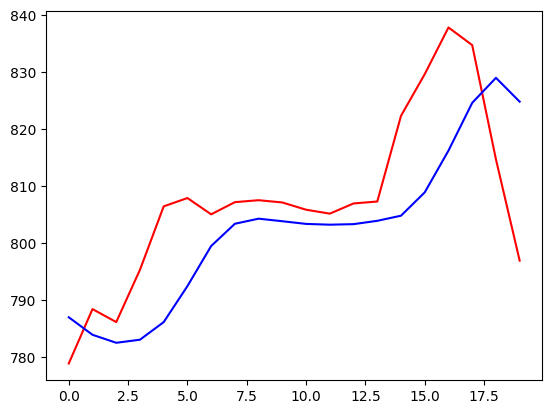

In [70]:
plt.plot(real,color="red",label="real")
plt.plot(predicts,color="blue",label="fake")


In [71]:
import math
from sklearn.metrics import mean_squared_error

In [72]:
math.sqrt(mean_squared_error(real,predicts))

12.83846478138948